<a href="https://colab.research.google.com/github/pinaraltiner/Quantitative-proteomics/blob/master/eubic_protrein_workshop_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Workshop session B: Phosphoproteomics data analysis

This workshop aims to explore various strategies for PTM dataset analysis, offering a comprehensive understanding of key processing and validation approaches for PTM studies. Participants will work with a dataset of synthetic phosphopeptides, covering all analysis steps from spectrum identification to the validation and scoring of phosphorylation sites. The results from the different approaches investigated will be compared to assess their respective limitations and advantages.

---


#Requirements

## Dataset

For this workshop you will be using a dataset published by [Ferries et al](https://pubs.acs.org/doi/10.1021/acs.jproteome.7b00337) of synthetic phosphopeptide analyzed on an Orbitrap Fusion.  In this paper, the authors compared three different fragmentation method (HCD, EThcD, and neutral-loss-triggered ET(ca/hc)D) with two analyzers for MS/MS (orbitrap (OT) and ion trap(IT)). Today you are going to use the first replicate raw files acquired by EThcD_OT.

The raw file as well as the description of the experimental procedure are available here: https://ftp.pride.ebi.ac.uk/pride/data/archive/2019/09/PXD007058/.


*▶* For *this* workshop, You can download the raw files by matching the correct names:
1. SF_200217_pPeptideLibrary_pool1_EThcD_OT_rep1.raw
2. SF_200217_pPeptideLibrary_pool2_EThcD_OT_rep1.raw
3. SF_200217_pPeptideLibrary_pool3_EThcD_OT_rep1.raw
4. SF_200217_pPeptideLibrary_pool4_EThcD_OT_rep1.raw
5. SF_200217_pPeptideLibrary_pool5_EThcD_OT_rep1.raw



## Softwares

##Instalation of MSConverGUI
For file conversion, we will use MSConvertGUI. You can download the tool here: https://proteowizard.sourceforge.io/download.html.
If you would like to use different Command Line Interface (CLI) tools, you are free to do it.

##Instalation of Comet:
https://sourceforge.net/projects/comet-ms/files/

##Installation of pyAscore:
```
#Before downloading, you will need to have Python 3.6+ and g++ 7+ installed
python3 --version
g++ --version
```
For further information: https://pyascore.readthedocs.io/en/latest/
```
pip install pyascore
```
---



## 1-Spectra identification and scoring

The first tasks of this workshop will consist in performing spectra identification using various approach. Open-search will be conducted with MS-fragger via frag pipe. Closed search with the database search engine Comet.
https://comet-ms.sourceforge.net/
### Open-search with MS fragger

TODO


# -- Close-search with Comet --

## 1-File conversion .raw to .mzML
Initially, we will convert raw files to .mzML to make it compatible with comet.
To do so, we will use MSConvertGUI.

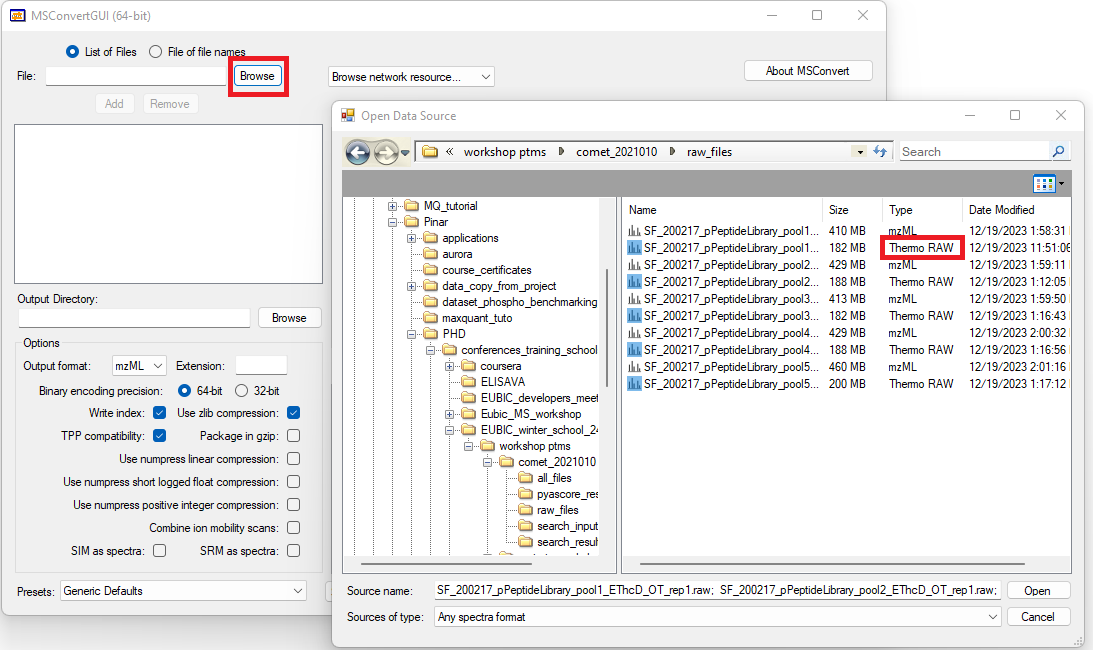

## 1-Peptide identification and scoring using Comet
After obtaining .mzML files, we will start to run search using comet by command line interface. Comet needs 2 input files; .mzML files and comet.params file which contains all search parameters that are necessary for identification.

P.S. We recomend you to use debian version of comet; however, you can try with different operating systems.
```
# Selecting of all mzML files with asterisk (*)
./comet.2021010.debian.exe *.mzML -PPXD007740.comet.params
```
# Running of pyAscore
```
pyascore --residues STY --mod_mass 79.9663 *.mzML comet_search_result.pep.xml output_file.tsv
```
## Q: How can we make run the search results efficiently with pyAscore using command line?

In [ ]:
%%shell
#!/bin/bash

# Read each line from the file and run the pyascore command
# What is "file_list"? What does it contain?
file_list="list_of_files.txt"

# Check the file exists
if [ -f "$file_list" ]; then

  tr -d '\r' < "$file_list" | while read -r filename; do
    pyascore --residues STY --mod_mass 79.9663 "../path_to_mzml_files/${filename}.mzML" "../path_to_search_files/${filename}.pep.xml" "${filename}.tsv"
  done
else
  echo "Error: File '$file_list' not found."
fi
## P.S. output_dir cannot specified in the code. It is crashing.

## Let's look at the pyAscore output files.
### Q: What do you see in the file? How can we do interpretation on this dataset?
### Q: How can we compare this result with the open-search result from the previous analysis?
----------------------------------------------------------------------------
### Since we know the correct position of phosphorylation sites in each synthetic phospho-peptide, we can try to map the expected phospho-peptides with the experimental result.

###Q: How can we do mapping? Do we need to change something initally in the experimental result?


In [4]:
%load_ext rpy2.ipython

In [32]:
#@title Position Extraction Function#

%%R
# Load required libraries
library(dplyr)
library(stringr)

# Define a function to extract the letter before square brackets and its position

subtract_based_on_count <- function(text,option) {

  result <- list()
  final_result <- list()
  final_result2 <- NULL

  if(option == "all"){

    num_matches <- length(str_extract_all(text, "\\[(\\d+)\\]")[[1]])
    #str_count(text, pattern = "([A-Za-z])\\[(\\d+)\\]")

    if (num_matches == 1){

      final_result2 <- gregexpr("([A-Za-z])\\[(\\d+)\\]", text, perl = TRUE)[[1]][1]

    }else if (num_matches > 1 ){

      final_result[1] <- gregexpr("([A-Za-z])\\[(\\d+)\\]", text, perl = TRUE)[[1]][1]

      for (i in 1:num_matches) {

        result[i] <- as.numeric(gregexpr("([A-Za-z])\\[(\\d+)\\]", text, perl = TRUE)[[1]][i])

        final_result[i] <- result[[i]][1] - ((i-1) * 4)
      }
      final_result2 <- paste(final_result,collapse = "&")
    }
  }else if(option=="phospho"){

    phospho <- gsub("(\\[80\\])|\\[\\d+\\]", "\\1", text)

    num_matches <- length(str_extract_all(phospho, "\\[(\\d+)\\]")[[1]])

    if (num_matches == 1){

      final_result2 <- gregexpr("([A-Za-z])\\[(\\d+)\\]", phospho, perl = TRUE)[[1]][1]

    }else if (num_matches > 1 ){

      final_result[1] <- gregexpr("([A-Za-z])\\[(\\d+)\\]", phospho, perl = TRUE)[[1]][1]

      for (i in 1:num_matches) {

        result[i] <- as.numeric(gregexpr("([A-Za-z])\\[(\\d+)\\]", phospho, perl = TRUE)[[1]][i])

        final_result[i] <- result[[i]][1] - ((i-1) * 4)
      }
      final_result2 <- paste(final_result,collapse = "&")
    }
  }
  #final_result2 <- paste(final_result,collapse = "&")
  return(final_result2)
}


This is the example sequence output pyAscore to visualize what this function does:
We need two input to run this function:

1-pyAscore output file

2-option (there are two possibilities; all for searching all PTMs, phospho for selecting only phosphorylation)

Since we are interested only in phosphorylation, we can type "phospho" for option.

In [ ]:
%%R
text <- "EM[16]AGPSREMGTGLHT[80]R"
subtract_based_on_count(text=text,option="phospho")

Here we are applying the function for the entire column of interest in the pyAscore output table.

In [29]:
%%R
library(dplyr)
df_result <- dataset %>%
  mutate(result = sapply(LocalizedSequence, subtract_based_on_count, option = "phospho"))

print(head(df_result$result))
#write.table(df_result, file='/content/pyAscore_assessment/extract_pos_SF_200217_pPeptideLibrary_pool1_EThcD_OT_rep1.tsv',col.names=T,row.names=F)

QQAQVEVIRS[80]GQK DSRDPLVGES[80]LKR  KGT[80]KGSEDSPPK    ELVET[80]IEKQK 
             "10"              "10"               "3"               "5" 
SGGAGKVTKS[80]AQK KGASAT[80]KHDSEGK 
             "10"               "6" 


## 2-Workflow comparison

(TODO here we have to write thte code and visualization for comparing the results from the different searches)

In [ ]:
print("Welcome to the Protrein workshop at EUBIC winterschool 2024")

Welcome to the Protrein workshop at EUBIC winterschool 2024
